In [1]:
import pandas as pd

def load_data():
    # in1 = input('Enter the train data filename/path name:  ')
    # in2 = input('Enter the train data filename/path name:  ')
    # train = pd.read_csv(in1)
    # test = pd.read_csv(in2)
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test

In [2]:
def data_insight(data):
    
    for ds in data:
        print(ds.head())
        print('-'*124)
        print(ds.info())
        print('-'*124)
        print(ds.describe())
        print('-'*124)
        print(ds.describe(include = 'all'))
        print('-'*124)
        print('The columns of the dataframe are:\n',ds.columns.values)
        print('-'*124)
        print('The datatypes of the dataframe are:\n',ds.dtypes)
        print('*'*124)


In [3]:
def find_nulls(data):
    ls = []
    for ds in data:
        for col in ds.columns.values:
            if ds[col].isnull().sum() != 0:
                ls.append(col)
    return ls
            

In [4]:
def impute_nulls(ls, data):
    for ds in data:
        for col in ls:
            if ds[col].dtypes == 'float64' or ds[col].dtypes == 'int64':
                ds[col].fillna(ds[col].median(), inplace = True)
            elif ds[col].dtypes == 'object':
                ds[col].fillna(ds[col].mode()[0], inplace = True)

In [5]:
def family_group(size):
    s = ''
    if size <= 1:
        s = 'alone'
    elif size <= 4:
        s = 'small'
    else:
        s = 'large'
    return s

In [6]:
def new_features(train):
    train['family_size'] = train['SibSp'] + train['Parch'] + 1
    train['family_group'] = train.family_size.map(family_group)
    #train['age_group'] = train['Age'].map(age_group)
    train['fare_per_person'] = train['Fare'] / train['family_size']
    
    return train

In [7]:
def prepare_dummies(train):
    train = pd.get_dummies(train, columns = ['Embarked', 'family_size'], drop_first = True)
    print('This shape of the dataframe frame changes as we are imputing dummies for the categorical variables:\n', train.shape, '\n','-'*124)
    return train


In [8]:
def split_n_model(X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)
    print('x_train shape:', x_train.shape)
    print('y_train shape:', y_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_test shape:', y_test.shape)
    print('*'*45, 'Algorithms', '*'*45, '\n 1. Logistic Regression \n 2. KNN \n 3. SVM \n 4. Decision Tress \n 5. Random Forests')
    algo = int(input("Choose the algorithm's respective no: "))
    if algo == 1:
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        print('Successfully trained the model using LogisticRegression')
        model = lr
    
    elif algo == 2:
        k = int(np.sqrt(x_train.shape[0]))
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        print('Successfully trained the model using KNN')
        model = knn
    
    elif algo == 3:
        svm = SVC(kernel = 'linear')   
        svm.fit(x_train, y_train)
        print('Successfully trained the model using SVM')
        model = svm

    elif algo == 4:
        dtree = DecisionTreeClassifier(max_depth = 3)
        dtree.fit(x_train, y_train)
        print('Successfully trained the model using Decision trees')
        model = dtree

    elif algo == 5:
        rfc = RandomForestClassifier()
        rfc.fit(x_train, y_train)
        print('Successfully trained the model using Random forest')
        model = rfc
    return x_train, x_test, y_train, y_test, model

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
def model_predictions(model, x_test, y_test):
    print('-'*120)
    predictions = model.predict(x_test)
    # y_test  actual labels

    print('The accuracy score for the model used is:', accuracy_score(y_test, predictions))
    print('Confusion matrix:', confusion_matrix(y_test, predictions, labels = None))
    return predictions


This shape of train data: (891, 12) and the shape of test data: (418, 11) 
 ****************************************************************************************************************************
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0     

The correlation matrix:
              PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.172482  0.096688  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  


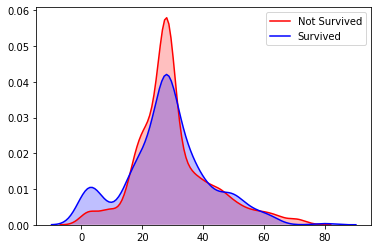

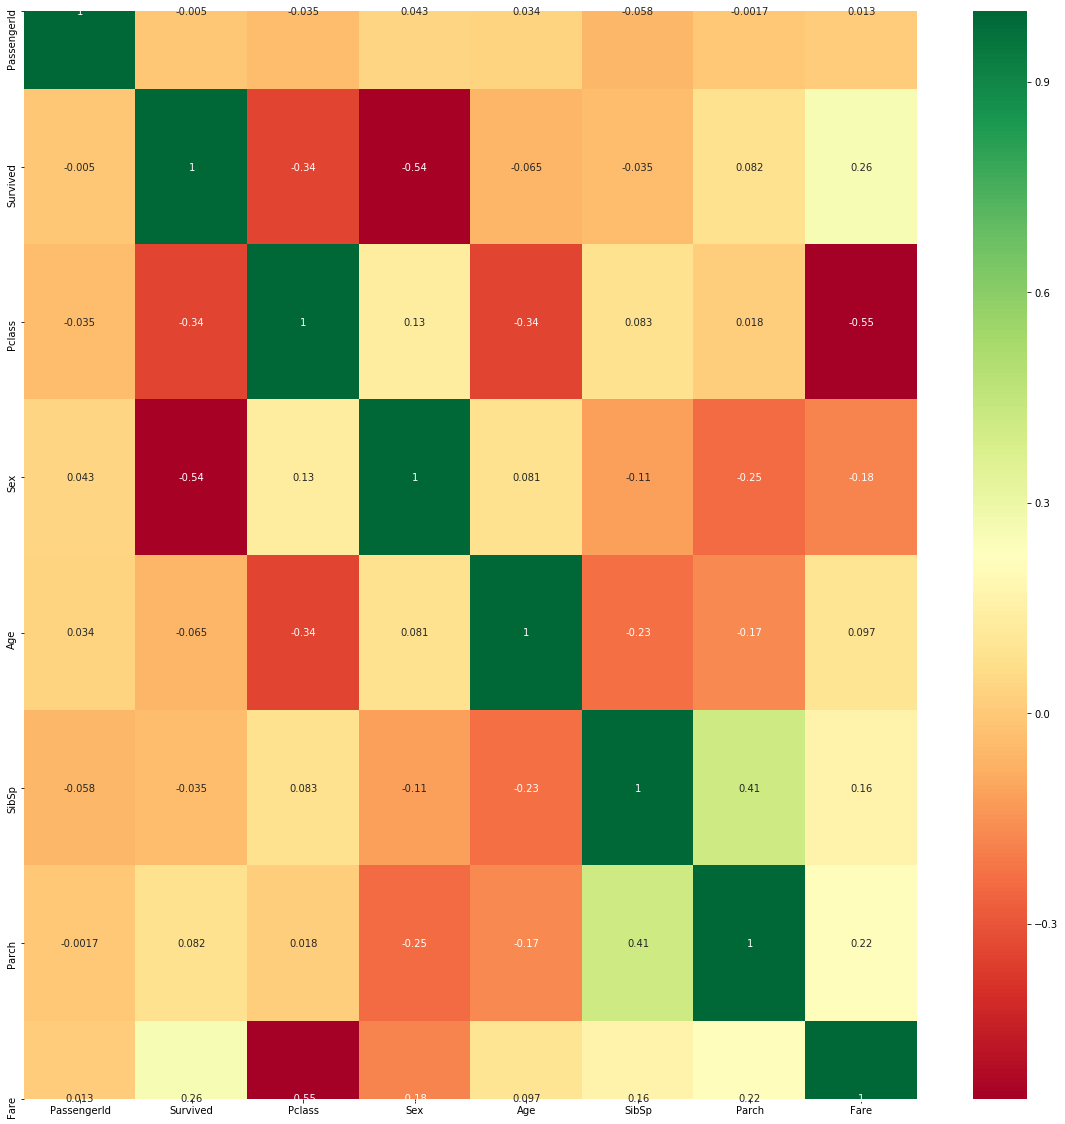

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

if __name__ == '__main__':
    
    train, test = load_data()
    data = [train, test]
    print('This shape of train data:', train.shape,'and the shape of test data:', test.shape,'\n','*'*124)
    data_insight(data)
    
    # set PassengerId as index
    #for ds in data:
    #    ds.set_index(['PassengerId'], inplace = True)
     #   print(ds.head(1),'\n','-'*124 )
        
    # replacing sex from strings to an integer
    for ds in data:
        ds['Sex'] = ds.Sex.apply(lambda x: 0 if x == 'female' else 1)
        print(ds['Sex'].head(), '\n','-'*124)
    
    # now we need to find null values
    ls = find_nulls(data)
    print('Columns having null values are:',ls, '\n','-'*124)
    data = impute_nulls(ls, data)
    print(train.isnull().sum(), '\n','-'*124)
    print(test.isnull().sum(), '\n','-'*124)
    
    # box plot to check if any outliers are present
    #ls1 = train.columns.values
    #for col in ls1:
     #   sns.boxplot(x = 'Survived', y = col, data = train)
    # based on the outlier presence we can trim the data
    
    # check the relation btw Survived and Sex
    print(train.groupby('Survived').mean(), '\n','-'*124)
    print(train.groupby('Sex').mean(), '\n','-'*124)
    #sns.barplot(x = 'Survived', y = 'Sex', data = train)
    #sns.barplot(x = 'Pclass', y = 'Survived', data = train)
    #sns.barplot(x = 'Age', y = 'Survived', data = train)
    
    sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color = 'r', shade = True, Label = 'Not Survived')
    sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color = 'b', shade = True, Label = 'Survived')
    
    # now let's find out the correlation matrix
    corr = train.corr()
    print('The correlation matrix:\n', corr, '\n','-'*124)
    top_features = corr.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(train[top_features].corr(),annot=True,cmap="RdYlGn")
    
    # new features
    train = new_features(train)
    print(train.head(), '\n','-'*124)
    print(train.dtypes, '\n','-'*124)
    
    # now we need to create dummies for the object type columns
    # here we can drop Name, Ticket, Cabin which aren't useful to decide whether a persom survives or not
    # we prepare dummies for Embarked, family_group, while others are already numeicals
    train = pd.get_dummies(train, columns = ['Embarked'], drop_first = True)
    print('This shape of the dataframe frame changes as we are imputing dummies for the categorical variables:\n', train.shape, '\n','-'*124)
    print(train.dtypes, '\n','-'*124)
    # now we can drop unncessary features
    train.drop(['Name','Fare', 'Ticket', 'Cabin', 'family_group', 'fare_per_person', 'family_size'], axis = 1, inplace = True)
    print(train.head(),'\n','-'*124 )
    
    X = train.drop('Survived', axis = 1)
    Y = train['Survived']
    print('features shape:', X.shape,'and lables shape:', Y.shape, '\n','-'*124)
    x_train, x_test, y_train, y_test, model = split_n_model(X, Y)
    predictions = model_predictions(model, x_test, y_test)
    
    passenger_id = x_test['PassengerId']
    df = pd.DataFrame(pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions}))

    df.to_csv('titanic_RF.csv', index = False)    
    